In [951]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import pickle
from projectionFunctions import etl as etl
from projectionFunctions import preprocessing as pp
from projectionFunctions import modeling as m
from projectionFunctions import compile_projections as cp
import shap

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_rows', 999)
pd.options.display.max_columns = 999
pd.set_option('large_repr', 'truncate')

In [952]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Set Variables

In [361]:

target_dict = {
  "hitters": ['AVG','OBP','SLG','BABIP','BB%','K%','wOBA','HR_per_PA','R_per_PA','RBI_per_PA','WAR_per_PA'],
  "SP": ['ERA','BB_per_9','K_per_9','OBP','SLG','ShO_per_GS','CG_per_GS'],
  "RP": ['ERA','BB_per_9','K_per_9','OBP','SLG','SVHLD_per_G']
}

stat_categories_H = ['OBP','SLG','HR','R','RBI','NetSB']
stat_categories_P = ['ERA','BB/9','K/9','OPS','QS+','SVHLD']

year = 2020
position_group = 'SP'
target = ['OBP']
pca = False
knn= 5
cv=3
set_alpha = 0
set_lambda = 1
max_depth = 3
learning_rate = .05
col_sample = .6
subsample = .5
ntrees = 1000
random_state = 88
param_grid = {
    'max_depth':[max_depth, 4], 
    'eta':[learning_rate,.1, .15],
    'colsample_bytree': [col_sample, .5, .7]}



#### ETL Fangraphs and Statcast Data

In [ ]:
# getFangraphs_hitters(end_year = (year-1))
# getFangraphs_pitchers(end_year = (year-1))
# getStatcast_hitters(end_year = (year-1))
# getStatcast_pitchers(end_year = (year-1))

#### Preprocessing Steps for Position Groups:
1. Hitters
2. Starting Pitchers (SP)
3. Relief Pitchers (RP)

In [ ]:
# pp.preprocessing(year,
#     data_start = 2015, 
#     position_group = position_group, 
#     target = target,
#     max_missing_rate_in_columns = .3,
#     PT_min_H = 200,
#     PT_min_SP = 100, 
#     PT_min_RP = 30,  
#     nlevels = 2, 
#     knn = knn, 
#     pca_level = .95 , 
#     test_size = .15, 
#     random_state = random_state, 
#     WAR_min_SP = 1.5,
#     WAR_min_RP = 1.5,
#     WAR_min_H = 1.5,
#     PT_drop_min_SP = 60,
#     PT_drop_min_RP = 30,
#     PT_drop_min_H = 200, 
#     PT_keep_threshold_SP = 120, 
#     PT_keep_threshold_RP = 40, 
#     PT_keep_threshold_H = 400
#     )

#### Make Models for Targets:


In [ ]:
# position_group = 'hitters'
# # target = [target_dict['RP'][0]]
# target = ['SLG']

# m.make_model(year, 
#     position_group,
#     target,
#     knn,
#     cv,
#     pca,
#     set_alpha,
#     set_lambda,
#     max_depth,
#     learning_rate,
#     col_sample,
#     subsample,
#     ntrees,
#     random_state,
#     param_grid
#     )

#### Compile Shapley Values

In [ ]:
# df = m.collect_ShapValues(position_group, year,target_dict)
# df

#### Load Model and Data into Notebook

In [1216]:
position_group = 'SP'
target = ['CG_per_GS']
X_train_i , X_test_i, y_train_i, y_test_i, \
X_train_prod, X_test_prod, y_train_prod, y_test_prod,\
model_i,model_prod, \
X_train_raw,X_test_raw,X_train_raw_i,X_test_raw_i = m.load_model(target = target ,position_group = position_group, pca=pca, year=year)



In [1221]:
# m.plot_shap_imp(model_prod,X_train_prod)
# m.plot_shap_dependence(model_prod,X_train_prod,'Age')

In [ ]:
log = pd.read_csv('modeling/model_log.csv',index_col=0)
log = log[(log['Position_Group']==position_group) ]#& (log['Target']==target[0])]
log.groupby('Target')['Test_R2'].max().sort_values(ascending=False)

#### Compile Projections

In [1279]:
projections_final_H = cp.compile_hitting(year,stat_categories_H ,target_dict)
projections_final_P = cp.compile_pitching(year,stat_categories_P ,target_dict)
projections_final = cp.compile_combined(projections_final_H,projections_final_P)
projections_final

,Name,Team,Position,Position_agg,Position_group,ADP,Rank,vsADP,FVARPz,FVAAz,posAdj,PA,OBP,SLG,R,HR,RBI,NetSB,IP,ERA,K/9,BB/9,OPS,QS+,SVHLD
0,Mike Trout,Angels,OF,OF,H,2.1,1,1.1,18.94,13.68,5.270,657,0.432,0.607,115,43,105,10,,,,,,,
1,Nolan Arenado,Rockies,3B,3B,H,12.7,2,10.7,15.51,8.59,6.920,659,0.373,0.556,100,38,113,1,,,,,,,
2,Christian Yelich,Brewers,OF,OF,H,2.9,3,-0.1,15.28,10.01,5.270,658,0.406,0.574,107,37,103,16,,,,,,,
3,Alex Bregman,Astros,"3B,SS",SS,H,9.7,4,5.7,15.24,8.7,6.550,665,0.395,0.546,107,35,105,4,,,,,,,
4,Cody Bellinger,Dodgers,"1B,OF",OF,H,4.8,5,-0.2,14.59,9.33,5.270,648,0.385,0.556,104,40,109,9,,,,,,,
5,Jacob deGrom,Mets,SP,SP,P,10.7,6,4.7,14.53,9.9,4.640,,,,,,,,205,2.786,11.61,2.07,0.618,27.1,0
6,Juan Soto,Nationals,OF,OF,H,10.4,7,3.4,14.5,9.23,5.270,663,0.406,0.555,103,35,107,6,,,,,,,
7,Freddie Freeman,Braves,1B,1B,H,17.5,8,9.5,14.35,7.95,6.400,663,0.392,0.543,100,34,106,4,,,,,,,
8,Max Scherzer,Nationals,SP,SP,P,15.4,9,6.4,14.29,9.65,4.640,,,,,,,,201,2.978,11.79,1.95,0.61,25.3,0
9,Gerrit Cole,Yankees,SP,SP,P,6.1,10,-3.9,13.87,9.23,4.640,,,,,,,,205,3.055,12.18,2.4,0.607,26.5,0


#### Analysis

In [1281]:
cp.postion_preview(projections_final,position='SP', head=40)


,Name,Team,Position,Position_agg,Position_group,ADP,Rank,vsADP,FVARPz,FVAAz,posAdj,PA,OBP,SLG,R,HR,RBI,NetSB,IP,ERA,K/9,BB/9,OPS,QS+,SVHLD
5,Jacob deGrom,Mets,SP,SP,P,10.7,6,4.7,14.53,9.9,4.640,,,,,,,,205,2.786,11.61,2.07,0.618,27.1,0
8,Max Scherzer,Nationals,SP,SP,P,15.4,9,6.4,14.29,9.65,4.640,,,,,,,,201,2.978,11.79,1.95,0.61,25.3,0
9,Gerrit Cole,Yankees,SP,SP,P,6.1,10,-3.9,13.87,9.23,4.640,,,,,,,,205,3.055,12.18,2.4,0.607,26.5,0
10,Justin Verlander,Astros,SP,SP,P,11.9,11,0.9,13.25,8.61,4.640,,,,,,,,206,3.205,12.09,1.99,0.647,26.5,0
23,Walker Buehler,Dodgers,SP,SP,P,17.8,24,-6.2,10.73,6.09,4.640,,,,,,,,192,3.374,10.26,2.26,0.619,21.2,0
32,Shane Bieber,Indians,SP,SP,P,25.7,32.5,-6.8,9.67,5.03,4.640,,,,,,,,198,3.61,9.96,1.79,0.673,21.3,0
35,Stephen Strasburg,Nationals,SP,SP,P,26.7,36,-9.3,9.28,4.64,4.640,,,,,,,,197,3.48,10.67,2.53,0.661,21.2,0
42,Charlie Morton,Rays,SP,SP,P,51.5,43,8.5,8.87,4.23,4.640,,,,,,,,184,3.279,10.8,2.96,0.647,19.7,0
50,Mike Clevinger,Indians,SP,SP,P,27.2,51,-23.8,8.35,3.71,4.640,,,,,,,,163,3.419,11.28,2.91,0.623,14,0
53,Jack Flaherty,Cardinals,SP,SP,P,28.4,54,-25.6,8.22,3.58,4.640,,,,,,,,190,3.488,10.5,2.88,0.661,20.3,0


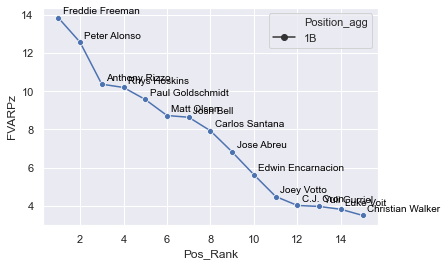

In [1210]:
cp.positional_shape(projections_final, position='1B')

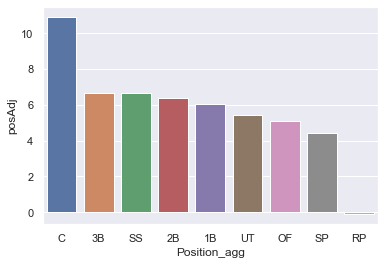

In [1192]:
cp.pos_adj_chart(projections_final)